In [105]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import math

In [2]:
# Dataframe from google drive - workout data
df = pd.read_csv(r'C:\Users\Manuel Elizaldi\Desktop\Learning-Testing\PyStrava\Outputs\All_Workouts_Table.csv')

--------------------------------
## Exploring relationships

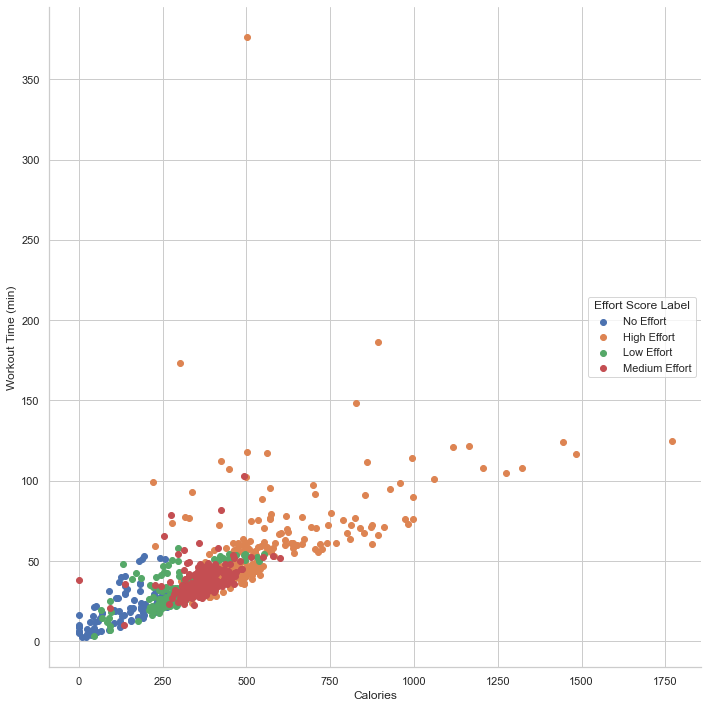

In [3]:
# Plotting relationship between calories and workout time 
df_cal_time = df[['calories','workout_time_min','effort_score_label']]
rows_to_drop = df_cal_time[df_cal_time == 1].dropna(how='all').index
df_cal_time = df_cal_time.drop(rows_to_drop)

# Apply the darkgrid theme
sns.set_theme(style="darkgrid")

# Set the whitegrid style
sns.set_style('whitegrid')

# Create the FacetGrid
grid = sns.FacetGrid(df_cal_time, hue='effort_score_label',height=10)
grid.map(plt.scatter, 'calories', 'workout_time_min')

# Set legend
plt.legend(title='Effort Score Label', loc='right', labels=['No Effort', 'High Effort', 'Low Effort','Medium Effort'])
# Set axis labels
plt.xlabel('Calories')
plt.ylabel('Workout Time (min)')

# Show the plot
plt.show()

c:\Users\Manuel Elizaldi\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


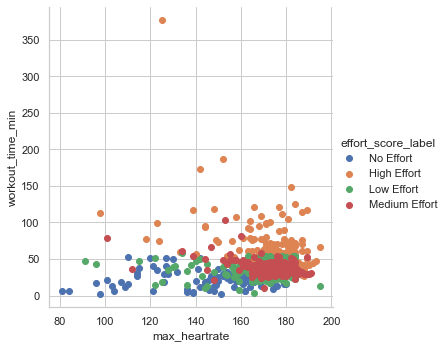

In [4]:
# Plotting relationship between max heart rate and workout time
df_maxheart_time = df[['max_heartrate','workout_time_min','effort_score_label']]

# Dropping workouts where max heart rate = 1 
rows_to_drop = df_maxheart_time[df_maxheart_time == 1].dropna(how='all').index
df_maxheart_time = df_maxheart_time.drop(rows_to_drop)

sns.set_style('whitegrid')
sns.FacetGrid(df_maxheart_time, hue='effort_score_label', size=5).map(plt.scatter,'max_heartrate','workout_time_min').add_legend()

plt.show()

c:\Users\Manuel Elizaldi\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


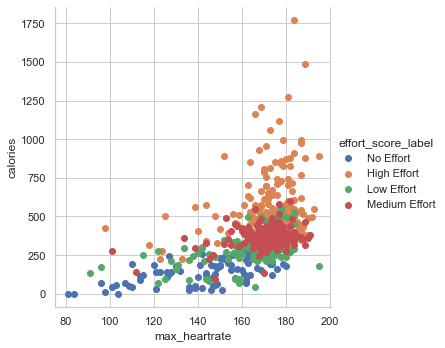

In [5]:
# Plotting relationship between max heart rate and workout time
df_maxheart_calories = df[['max_heartrate','calories','effort_score_label']]

# Dropping workouts where max heart rate = 1 
rows_to_drop = df_maxheart_calories[df_maxheart_calories == 1].dropna(how='all').index
df_maxheart_calories = df_maxheart_calories.drop(rows_to_drop)

sns.set_style('whitegrid')
sns.FacetGrid(df_maxheart_calories, hue='effort_score_label', size=5).map(plt.scatter,'max_heartrate','calories').add_legend()

plt.show()

c:\Users\Manuel Elizaldi\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


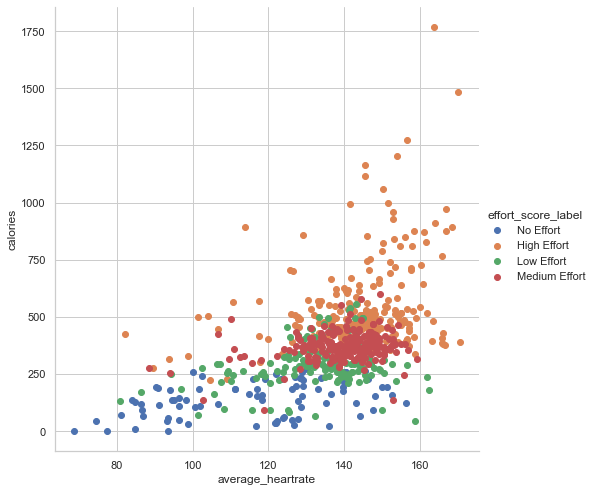

In [132]:
# Plotting relationship between max heart rate and workout time
df_avgheart_calories = df[['average_heartrate','calories','effort_score_label']]

# Dropping workouts where max heart rate = 1 
rows_to_drop = df_avgheart_calories[df_avgheart_calories == 1].dropna(how='all').index
df_avgheart_calories = df_avgheart_calories.drop(rows_to_drop)

sns.set_style('whitegrid')
sns.FacetGrid(df_avgheart_calories, hue='effort_score_label', size=7).map(plt.scatter,'average_heartrate','calories').add_legend()

plt.show()

In [10]:
df_model = df[['distance',
 'workout_time_min',
 'calories',
 'total_elevation_gain',
 'average_speed_km/h',
 'max_speed_km/h',
 'average_temp',
 'average_heartrate',
 'max_heartrate',
 'avg_time_per_lap',
 'lap_count',
 'effort_score_label']]

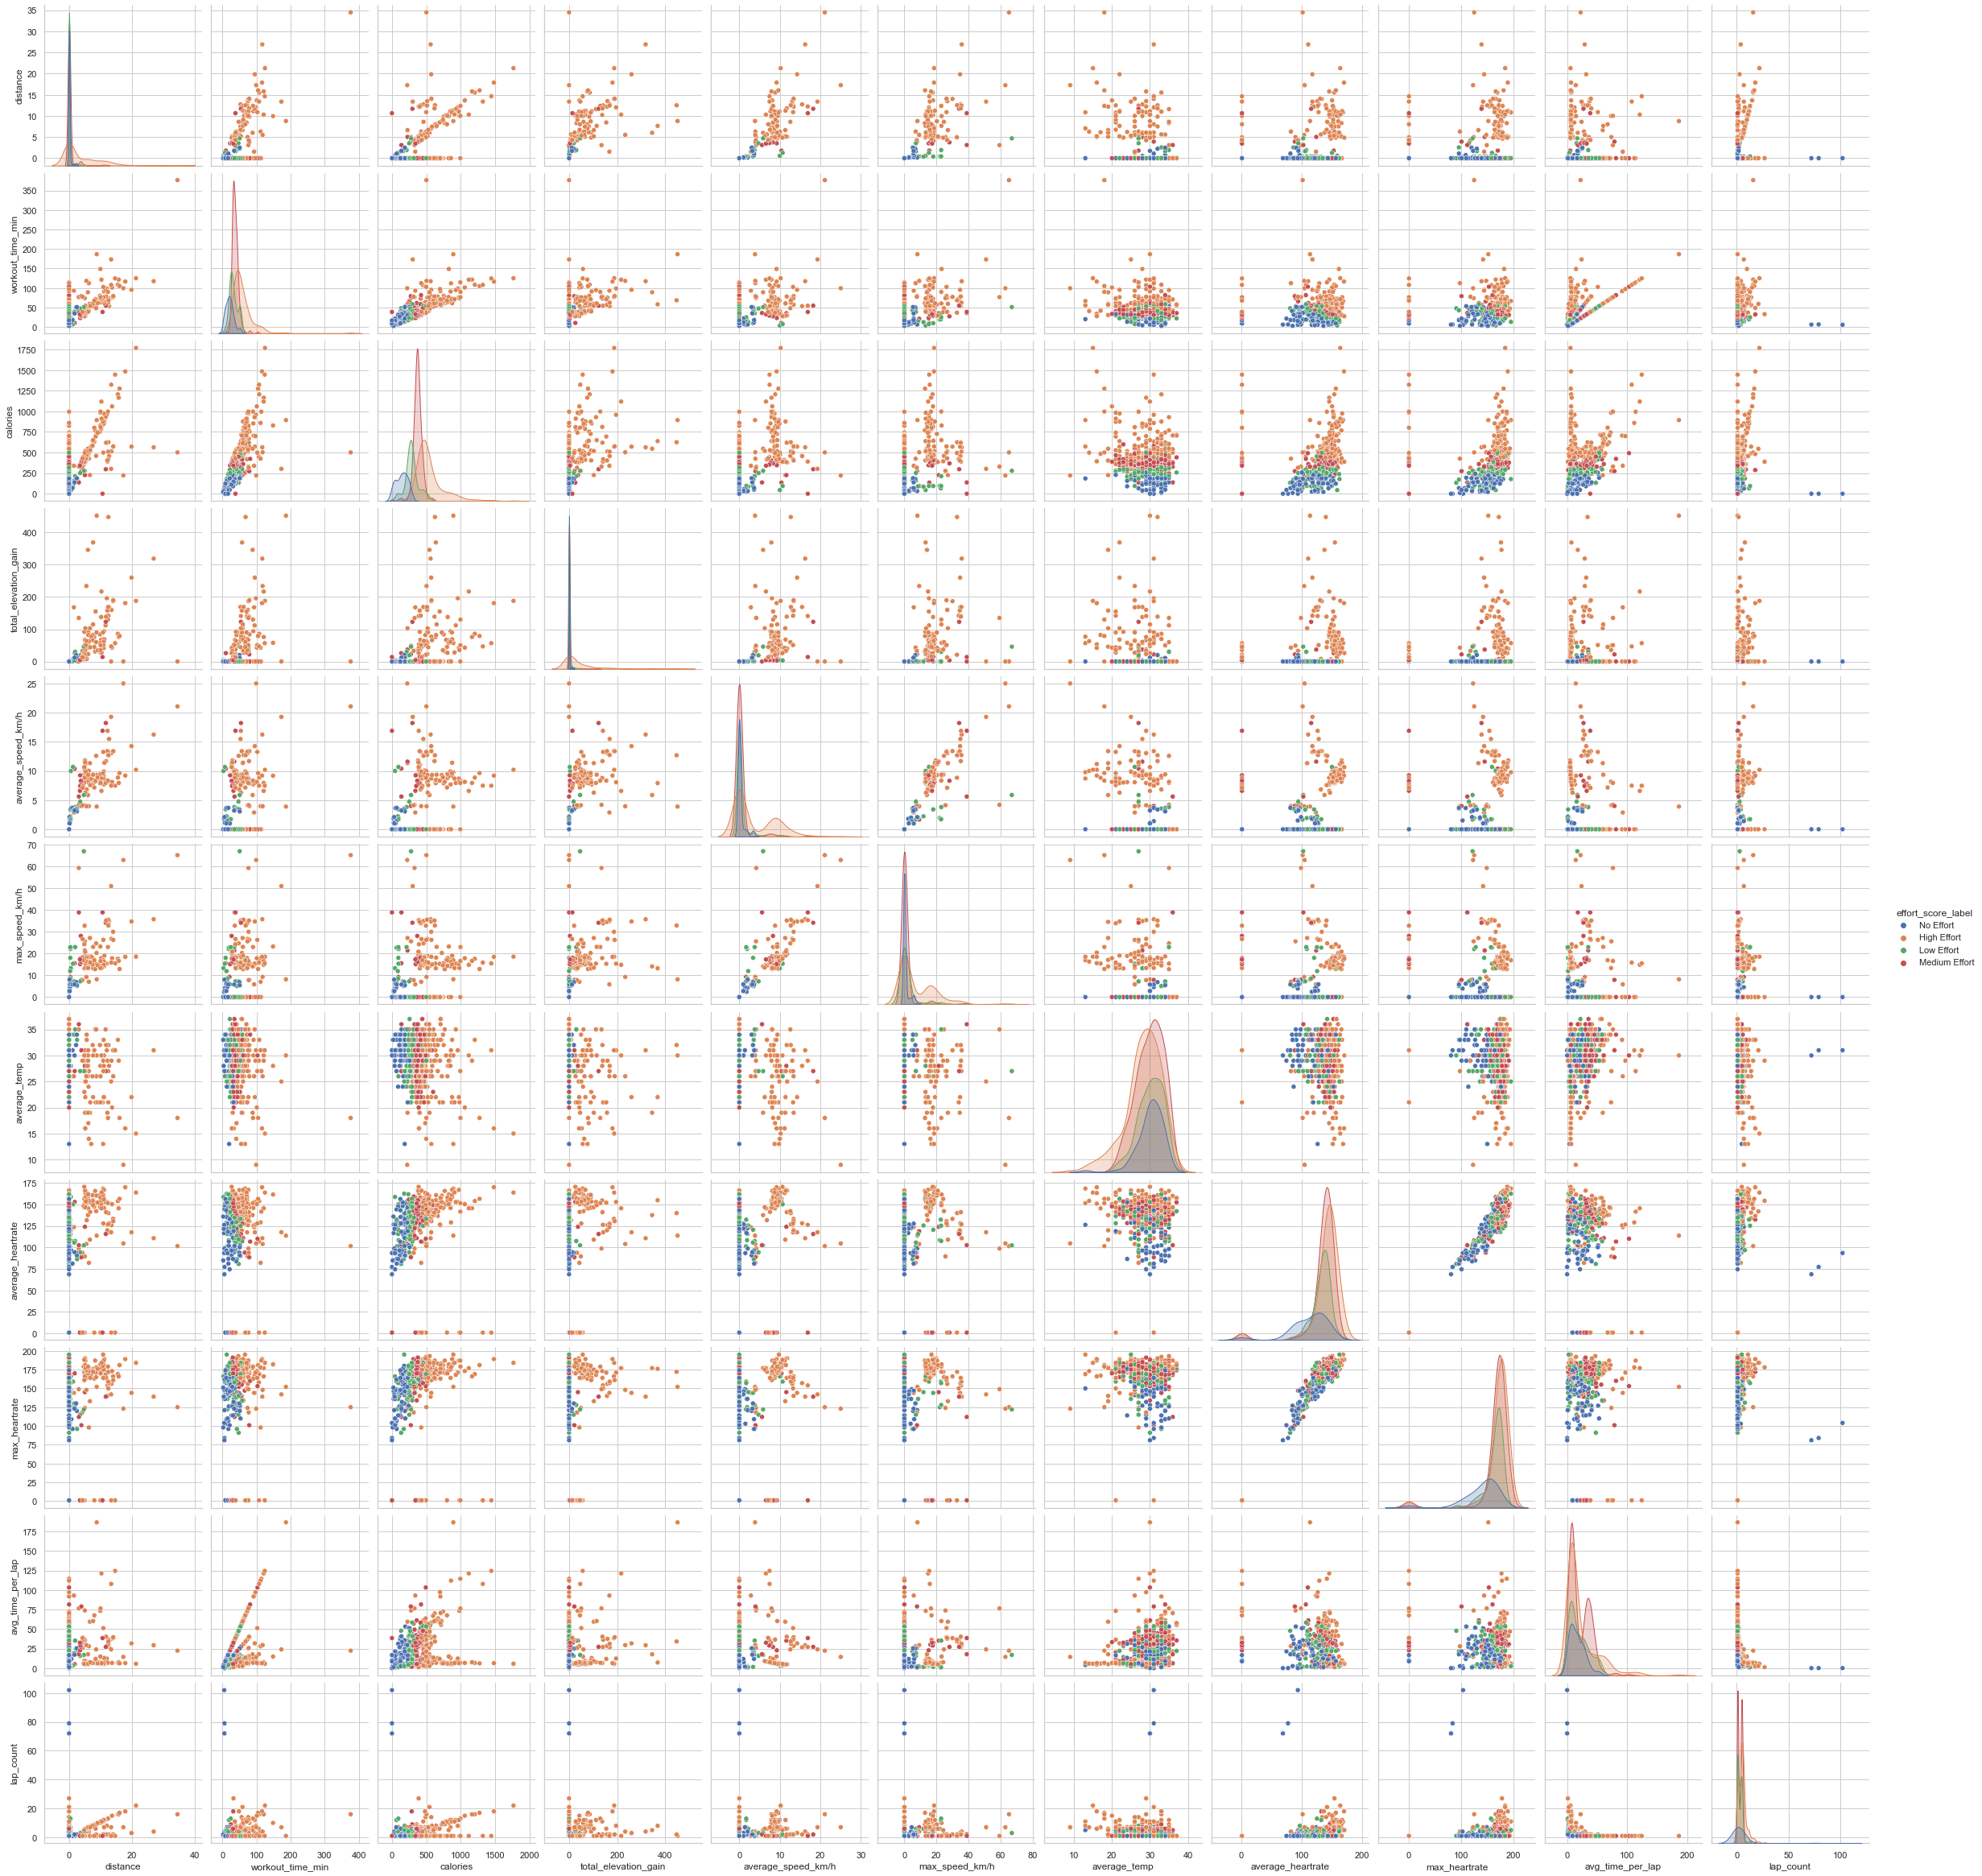

In [11]:
# Plotting all relationships between workouts variables
plt.close()
sns.set_style('whitegrid')
sns.pairplot(df_model, hue='effort_score_label', height=3)
plt.show()

In [12]:
# Fixing Nans, if we drop, we lose too much data
df = df.fillna(0)
len(df)

703

-----------------
## Variable Model

In [32]:
# Using workout metrics to calculate knn
y = df.iloc[:,30:31]
X = df[[
 'distance',
 'workout_time_min',
 'calories',
 'total_elevation_gain',
 'average_speed_km/h',
 'max_speed_km/h',
 'average_temp',
 'average_heartrate',
 'max_heartrate',
 'avg_time_per_lap',
 'lap_count',
 'effort_score']]

# checking lenght 
print(len(X))
print(len(y))

703
703


In [33]:
# Compute correlation using Pearson method
correlation_matrix = X.corr(method='pearson')

In [34]:
# Importing to excel to analyze correlation coefficients
#correlation_matrix.to_csv(r'C:\Users\Manuel Elizaldi\Desktop\Learning-Testing\PyStrava\Outputs\correlation_matrix_variables.csv')

In [35]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create the KNN model
k = int(math.sqrt(len(y_train))-1)
print(k)

# Feature scaling - sets numbers to a similar range
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

# training model 
knn = KNeighborsClassifier(n_neighbors=k ,p = 3, metric='euclidean').fit(X_train, y_train)

# Predict labels for the test data
y_pred = knn.predict(X_test)

7


c:\Users\Manuel Elizaldi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [36]:
# showing results
result = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(result)
result1 = classification_report(y_test, y_pred)
print('Classification Report:,')
print (result1)
result2 = accuracy_score(y_test,y_pred)
print('Accuracy:',round(result2,2))

Confusion Matrix:
[[73  1  5  0]
 [ 0 31  2  3]
 [ 3  3 59  2]
 [ 0  6  0 23]]
Classification Report:,
               precision    recall  f1-score   support

  High Effort       0.96      0.92      0.94        79
   Low Effort       0.76      0.86      0.81        36
Medium Effort       0.89      0.88      0.89        67
    No Effort       0.82      0.79      0.81        29

     accuracy                           0.88       211
    macro avg       0.86      0.86      0.86       211
 weighted avg       0.89      0.88      0.88       211

Accuracy: 0.88


In [37]:
y_test.value_counts()

effort_score_label
High Effort           79
Medium Effort         67
Low Effort            36
No Effort             29
dtype: int64

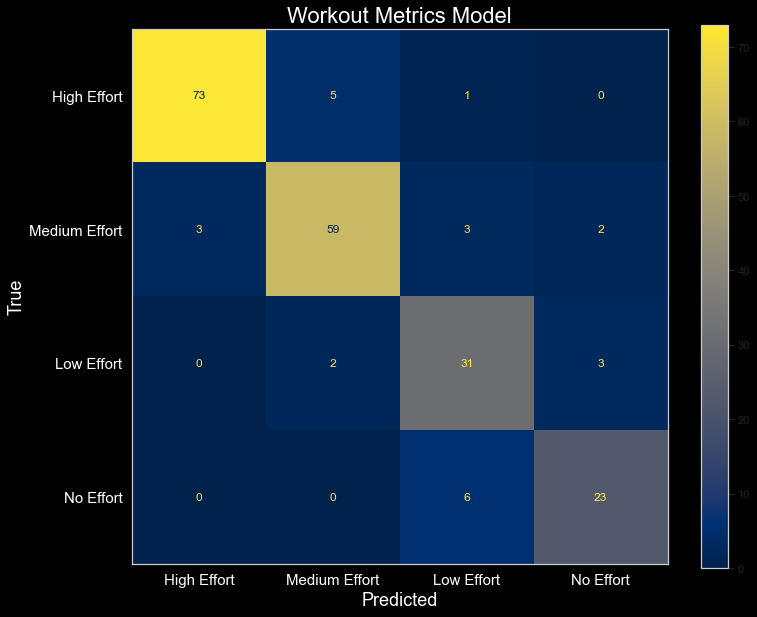

In [38]:
# Creating confusion matrix
labels = ['High Effort','Medium Effort','Low Effort','No Effort']
cm = confusion_matrix(y_test, y_pred, labels = labels)
cmd = ConfusionMatrixDisplay(cm, display_labels = labels)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(12, 10)) 
cmd.plot(ax=ax, cmap='cividis')

# Customize the plot properties
ax.set_xlabel('Predicted', fontsize=18, color='white') 
ax.set_ylabel('True', fontsize=18, color='white')
ax.set_title("Workout Metrics Model", fontsize = 22, color='white')

# Set tick labels color to white
ax.tick_params(axis='x', colors='white', labelsize = 15)
ax.tick_params(axis='y', colors='white', labelsize = 15)

# Set background color to black
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

# Remove grid lines
ax.grid(False)

plt.show()

## Model with score columns

In [103]:
# Using effort score variables to calculate model
y = df.iloc[:,30:31]
X = df[[
 'distance_score',
 'workout_time_score',
 'calorie_score',
 'total_elevation_gain_score',
 'average_heartrate_score',
 'max_heartrate_score',
 'avg_time_per_lap_score',
 'lap_count_score',
 'avg_speed_score',
 'max_speed_score',
 'effort_score']]

In [128]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create the KNN model
k=7
# k = int(math.sqrt(len(y_train))-1)
print(k)

# Feature scaling - sets numbers to a similar range
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

# training model 
knn = KNeighborsClassifier(n_neighbors=k ,p = 3, metric='euclidean').fit(X_train, y_train)

# Predict labels for the test data
y_pred = knn.predict(X_test)

7


c:\Users\Manuel Elizaldi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


--------------------------------
### Cross Validation Test for K 

In [111]:
# For k = 23
k_folds = KFold(n_splits=int(math.sqrt(len(y_train))-1))  
scores = cross_val_score(knn, X, y.values.ravel(), cv=k_folds)  # X: feature matrix, y: target variable

print("Cross-Validation Scores:", list(scores))
print("Mean CV Score:", scores.mean())

Cross-Validation Scores: [0.9411764705882353, 1.0, 0.9411764705882353, 0.9411764705882353, 0.8823529411764706, 0.8823529411764706, 0.9705882352941176, 0.8529411764705882, 0.9117647058823529, 0.9117647058823529, 1.0, 0.9696969696969697, 0.9090909090909091, 0.9090909090909091, 0.9393939393939394, 0.9090909090909091, 1.0, 0.9393939393939394, 0.9393939393939394, 0.9393939393939394, 0.8484848484848485]
Mean CV Score: 0.9303964009846362


In [125]:
# For K  = 7 
# Cross-Validation Scores more consistent 
k_folds = KFold(n_splits = 7)  
scores = cross_val_score(knn, X, y.values.ravel(), cv=k_folds)  # X: feature matrix, y: target variable

print("Cross-Validation Scores:", list(scores))
print("Mean CV Score:", scores.mean())

Cross-Validation Scores: [0.9504950495049505, 0.900990099009901, 0.9207920792079208, 0.96, 0.91, 0.96, 0.91]
Mean CV Score: 0.9303253182461103


-------
### Grid Search Test

In [127]:
import json
param_grid = {
    'n_neighbors': [5, 7, 23],  # Choose the desired values for the hyperparameter
    'weights': ['uniform', 'distance']  # Choose the desired values for other hyperparameters
}

grid_search = GridSearchCV(knn, param_grid, cv=k_folds)
grid_search.fit(X, y.values.ravel())


print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'n_neighbors': 7, 'weights': 'distance'}
Best Score: 0.967304964539007


In [129]:
# Testing model
print('Values:',y_test.value_counts())
result = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(result)
result1 = classification_report(y_test, y_pred)
print('Classification Report:,')
print (result1)
result2 = accuracy_score(y_test,y_pred)
print('Accuracy:',round(result2,2))

Values: effort_score_label
Medium Effort         74
High Effort           73
Low Effort            33
No Effort             31
dtype: int64
Confusion Matrix:
[[68  0  5  0]
 [ 0 26  7  0]
 [ 9  5 60  0]
 [ 0  4  0 27]]
Classification Report:,
               precision    recall  f1-score   support

  High Effort       0.88      0.93      0.91        73
   Low Effort       0.74      0.79      0.76        33
Medium Effort       0.83      0.81      0.82        74
    No Effort       1.00      0.87      0.93        31

     accuracy                           0.86       211
    macro avg       0.86      0.85      0.86       211
 weighted avg       0.86      0.86      0.86       211

Accuracy: 0.86


In [130]:
# Number checking
print('y_test count:',len(y_test))
print('y_pred count:',len(y_pred))
print(pd.DataFrame(y_test).value_counts())

y_test count: 211
y_pred count: 211
effort_score_label
Medium Effort         74
High Effort           73
Low Effort            33
No Effort             31
dtype: int64


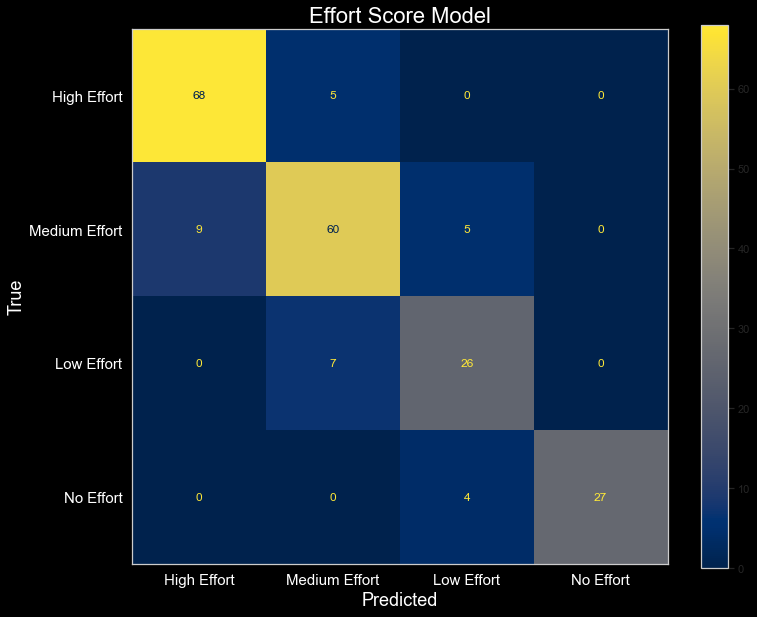

In [131]:
# Creating confusion matrix
labels = ['High Effort','Medium Effort','Low Effort','No Effort']
cm = confusion_matrix(y_test, y_pred, labels = labels)
cmd = ConfusionMatrixDisplay(cm, display_labels = labels)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(12, 10)) 
cmd.plot(ax=ax, cmap='cividis')

# Customize the plot properties
ax.set_xlabel('Predicted', fontsize=18, color='white') 
ax.set_ylabel('True', fontsize=18, color='white')
ax.set_title("Effort Score Model", fontsize = 22, color='white')

# Set tick labels color to white 
ax.tick_params(axis='x', colors='white', labelsize = 15)
ax.tick_params(axis='y', colors='white', labelsize = 15)

# Set background color to black
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

# Remove grid lines
ax.grid(False)

plt.show()